#### Python Classification

This dataset contains information of customers in bank, where you are working as Data Scientist. Through given variables you should predict whether a person makes less than 50K $ in a year. 

Dataset Description:
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad & Tobago, Peru, Hong, Holland-Netherlands.

In [57]:
import re
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
%matplotlib inline

In [58]:
df = pd.read_csv('income_evaluation.csv')
df.head(17)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# df.filter(regex=("f.*"))
# df.sub(lambda i: col.startswith('d'), axis=1)

In [59]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [60]:
df.columns = [re.sub('-', '_', i) for i in df.columns]
df.columns = [re.sub(' ', '', i) for i in df.columns]

In [61]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [62]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [63]:
df.replace(' ?', 'Unknown', inplace = True)

In [64]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [65]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.strip()

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [68]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [48]:
df.shape

(32561, 15)

In [69]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [72]:
df.drop(['fnlwgt', 'education_num'], axis = 1, inplace = True)

In [73]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [74]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [75]:
df.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [76]:
df_last = pd.get_dummies(df, drop_first = True)
df_last.head()

,age,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Unknown,native_country_Vietnam,native_country_Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_last.shape

(32561, 99)

In [78]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   capital_gain                               32561 non-null  int64
 2   capital_loss                               32561 non-null  int64
 3   hours_per_week                             32561 non-null  int64
 4   income                                     32561 non-null  int64
 5   workclass_Local-gov                        32561 non-null  uint8
 6   workclass_Never-worked                     32561 non-null  uint8
 7   workclass_Private                          32561 non-null  uint8
 8   workclass_Self-emp-inc                     32561 non-null  uint8
 9   workclass_Self-emp-not-inc                 32561 non-null  uint8
 10  workclass_State-gov                        325

<AxesSubplot:xlabel='income', ylabel='count'>

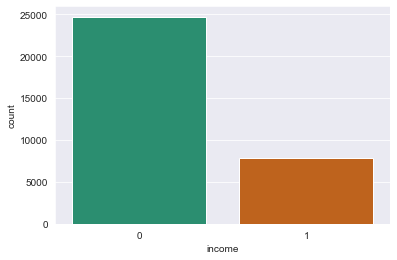

In [79]:
sns.set_style('darkgrid')
sns.countplot(x='income', data=df, palette='Dark2') 

#### Model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_last.drop('income',axis=1), 
           df_last['income'], test_size=0.30, 
            random_state=101)

#### Logistic Regression

In [81]:
# Models
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [82]:
#predictions
y_pred_log = logmodel.predict(X_test)

In [102]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test,y_pred_log).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_log).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_log).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_log))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test,y_pred_log))


 ACCURACY SCORE: 
 0.85

 ROC_AUC SCORE: 
 0.91

 PRECISION: 
 0.74

 RECALL: 
 0.61

 CONFUSION MATRIX: 

 [[6922  514]
 [ 905 1428]]


 CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7436
           1       0.74      0.61      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



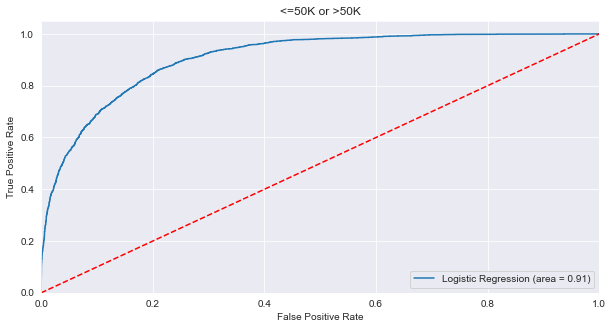

In [84]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Naive Bayes

In [85]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred_nb = NBmodel.predict(X_test)

In [103]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test,y_pred_nb).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, NBmodel.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_nb).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_nb).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_nb))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test,y_pred_nb))


 ACCURACY SCORE: 
 0.82

 ROC_AUC SCORE: 
 0.9

 PRECISION: 
 0.6

 RECALL: 
 0.77

 CONFUSION MATRIX: 

 [[6217 1219]
 [ 529 1804]]


 CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.92      0.84      0.88      7436
           1       0.60      0.77      0.67      2333

    accuracy                           0.82      9769
   macro avg       0.76      0.80      0.78      9769
weighted avg       0.84      0.82      0.83      9769



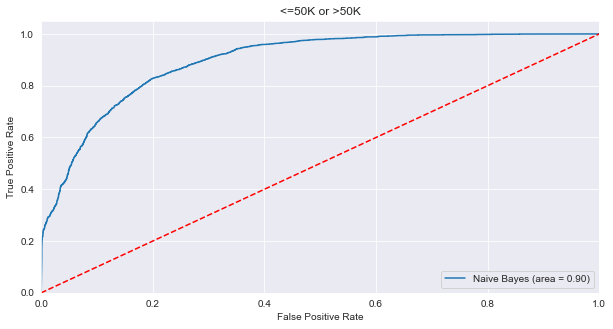

In [88]:
nb_roc_auc = roc_auc_score(y_test, NBmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

#### SVM

In [ ]:
svm = svm.SVC(kernel='poly', probability=True) # Linear Kernel
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [104]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test,y_pred_svm).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_svm).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_svm).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_svm))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test,y_pred_svm))

NameError: name 'y_pred_svm' is not defined

In [ ]:
SVM_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

#### Decision Tree

In [94]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [105]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test, y_pred_dt).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_dt).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_dt).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_dt))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test, y_pred_dt))


 ACCURACY SCORE: 
 0.82

 ROC_AUC SCORE: 
 0.77

 PRECISION: 
 0.62

 RECALL: 
 0.61

 CONFUSION MATRIX: 

 [[6546  890]
 [ 905 1428]]


 CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7436
           1       0.62      0.61      0.61      2333

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



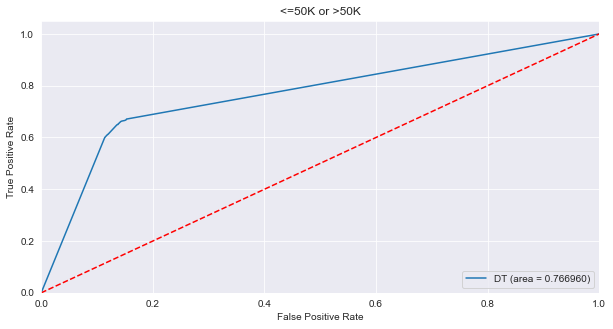

In [96]:
DT_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='DT (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

#### Random Forest

In [97]:
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(X_train,y_train);
y_pred_rf = rf.predict(X_test)

In [101]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test, y_pred_rf).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_rf).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_rf).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_rf))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test, y_pred_rf))


 ACCURACY SCORE: 
 0.84

 ROC_AUC SCORE: 
 0.87

 PRECISION: 
 0.7

 RECALL: 
 0.6

 CONFUSION MATRIX: 

 [[6846  590]
 [ 932 1401]]


 CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7436
           1       0.70      0.60      0.65      2333

    accuracy                           0.84      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



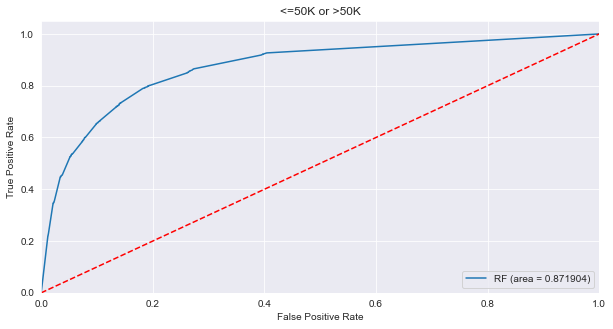

In [99]:
RF_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='RF (area = %02f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

#### KNN

In [107]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [108]:
print('\n ACCURACY SCORE: \n', accuracy_score(y_test, y_pred_knn).round(2))
print('\n ROC_AUC SCORE: \n', roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]).round(2))
print("\n PRECISION: \n", precision_score(y_test, y_pred_knn).round(2))
print("\n RECALL: \n", recall_score(y_test, y_pred_knn).round(2))
print('\n CONFUSION MATRIX: \n\n', confusion_matrix(y_test, y_pred_knn))
print('\n\n CLASSIFICATION REPORT: \n\n', classification_report(y_test, y_pred_knn))


 ACCURACY SCORE: 
 0.85

 ROC_AUC SCORE: 
 0.87

 PRECISION: 
 0.7

 RECALL: 
 0.63

 CONFUSION MATRIX: 

 [[6794  642]
 [ 858 1475]]


 CLASSIFICATION REPORT: 

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7436
           1       0.70      0.63      0.66      2333

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



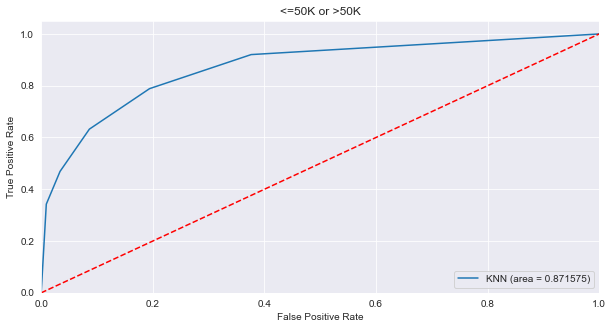

In [109]:
KNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('<=50K or >50K')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [110]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8412600170896745
Standard deviation of CV: 0.004112419488897762
